Import all the required libraries

In [37]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Load the data and convert to pandas data frame and add columns with normalized data.

In [23]:
data=datasets.load_iris()

In [29]:
type(data)

sklearn.utils.Bunch

In [30]:
data_frame= pd.DataFrame(data.data, columns=data.feature_names)
data_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
data_frame=data_frame.drop('sepal width (cm)',1)
data_frame=data_frame.drop('sepal length (cm)',1)
data_frame.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [36]:
data_frame['target']=data.target
data_frame.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


User defined function to normalize the data.

In [50]:
def min_max_normalize(x):
    return (x-x.mean())/(x.max()-x.min())
def mean_normalize(x):    
    return (x-x.mean())/x.std()

In [52]:
data_frame['petal length_normal']=mean_normalize(data_frame['petal length (cm)'])
data_frame['petal width_normal']=mean_normalize(data_frame['petal width (cm)'])
data_frame['petal length_min_max']=min_max_normalize(data_frame['petal length (cm)'])
data_frame['petal width_min_max']=min_max_normalize(data_frame['petal width (cm)'])
data_frame.head()

,petal length (cm),petal width (cm),target,petal length_normal,petal width_normal,petal length_min_max,petal width_min_max
0,1.4,0.2,0,-1.336794,-1.308593,-0.399774,-0.416111
1,1.4,0.2,0,-1.336794,-1.308593,-0.399774,-0.416111
2,1.3,0.2,0,-1.393470,-1.308593,-0.416723,-0.416111
3,1.5,0.2,0,-1.280118,-1.308593,-0.382825,-0.416111
4,1.4,0.2,0,-1.336794,-1.308593,-0.399774,-0.416111


User defined function to plot elbow method

In [55]:
def elbow_method(x,met):
    sse=[]
    k_range= range(1,10)
    for k in k_range:
        kmeans=KMeans(n_clusters=k).fit(x)
        #print(kmeans.inertia_)
        sse.append(kmeans.inertia_)
    plt.plot(k_range,sse,'bx-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find K'+met)
    plt.show()

(150, 2)


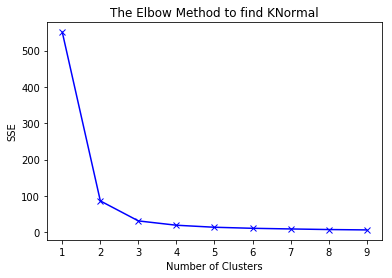

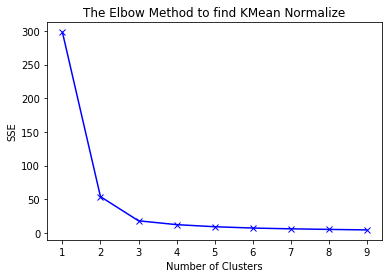

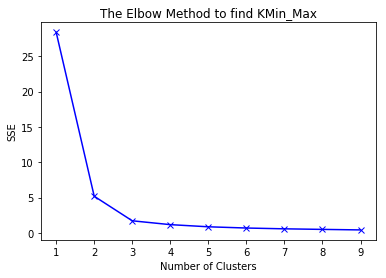

In [72]:
x=data_frame.iloc[:,0:2]
print(x.shape)
elbow_method(x,"Normal")
x2=data_frame.iloc[:,3:5]
elbow_method(x2,"Mean Normalize")
x3=data_frame.iloc[:,5:7]
elbow_method(x3,"Min_Max")

The scale(range) of SSE is different for different type of normalized data, for original data sse ranges between 0 to 500.<br>
For mean normalized it ranges between 0 to 300.<br>
For Min Max normalize it is between 0 to 30

User defined function to plot cluster as scatter plot

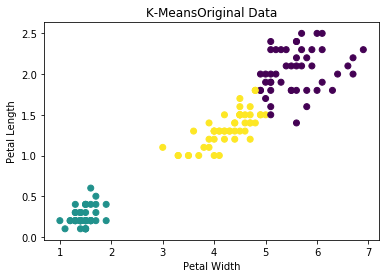

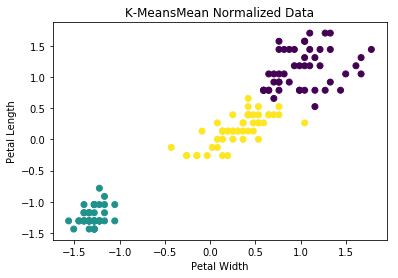

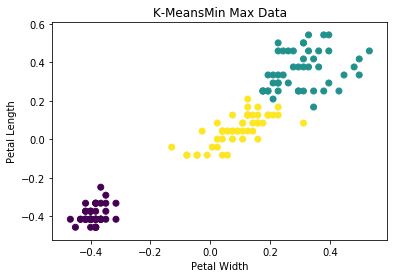

In [73]:
def plot_cluster(x,model,name):
    plt.figure('K-Means'+name)
    plt.scatter(x.iloc[:,0],x.iloc[:,1],c=model.labels_)
    plt.xlabel('Petal Width')
    plt.ylabel('Petal Length')
    plt.title('K-Means'+name)
    plt.show()
plot_cluster(x,kmeans,"Original Data")
plot_cluster(x2,kmeans_mean,"Mean Normalized Data")
plot_cluster(x3,kmeans_min_max,"Min Max Data")

Function to find center of clusters

In [67]:
def cluster_center(model,name):
    print(name,model.cluster_centers_)
kmeans=KMeans(n_clusters=3).fit(x)
cluster_center(kmeans,"Original Data")
kmeans_mean=KMeans(n_clusters=3).fit(x2)
cluster_center(kmeans_mean,"Mean_Normal Data")
kmeans_min_max=KMeans(n_clusters=3).fit(x3)
cluster_center(kmeans_min_max,"Min Max Data")

Original Data [[ 5.59583333  2.0375    ]
 [ 1.464       0.244     ]
 [ 4.26923077  1.34230769]]
Mean_Normal Data [[ 1.02469909  1.12372569]
 [-1.30052149 -1.25093786]
 [ 0.30462535  0.16553961]]
Min Max Data [[-0.38892655 -0.39777778]
 [ 0.30644068  0.35732639]
 [ 0.09109952  0.05263889]]


There is no difference between original data and various type of normalized data.So optimal number of clusters in all methods is 3.